In [3]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=43aff033ea7c79d24affbf86f2e1d000697dd680d4826ad1192b60c4800e7eab
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [7]:
with open('labelled_bedrooms_data_sample.txt.txt') as f:
    bedrooms_lines = f.readlines()

bedroom_files = []
for bedroom_line in bedrooms_lines:
    bedroom_files.append(bedroom_line.split("; ")[0])
bedrooms = []
for bedroom_line in bedrooms_lines:
    bedrooms.append(bedroom_line.split("; ")[2:])

In [11]:
from sentence_transformers import SentenceTransformer, LoggingHandler
import numpy as np


# Load pre-trained Sentence Transformer Model. It will be downloaded automatically
model = SentenceTransformer('all-MiniLM-L6-v2')

sentence_embeddings = model.encode(bedrooms)

In [13]:
#all sentences and embeddings
for sentence, embedding in zip(bedrooms, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [20]:
user_input = 'Little bedroom with yellow double ottoman and light table and picture'

In [21]:
prompt_embedding = model.encode(user_input)

In [22]:
def calculate_cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [24]:
similiarity = calculate_cosine_similarity(sentence_embeddings, prompt_embedding)
f = str(bedroom_files[np.argmax(similiarity)])

In [25]:
f

'bed_73.jpg'

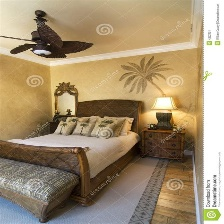

In [28]:
from IPython.display import Image
Image("/content/bed_73.jpg")